> ## EDA CASE STUDY - Lending Club Case Study
>Submitted By       : ***Suprabhat Paul***<br>
>Date of Submission : ***November 10th 2021***<br>
>Batch              : ***September - 2021***<br>

### Business Context
>    The company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures.When the company receives a loan application, the company has to make a decision for loan approval or reject the application based on the applicant’s profile.<br><br>
Once the application is accepted and the loan has to be sanctioned. The risk associated with that is either borrower will repay the amount in installments (both principal and interst) completely or can default leading to credit loss for the company.

### Problem Statement
>    Like most other lending companies, lending loans to 'risky' applicants is the largest source for the financial loss or credit loss. If the borrower refuses or fails to repay the loan are considered as 'Charged Off' and the repayment amount is the credit loss to the company.<br>

>    If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.<br>

>   Also, company wants to understand the driving factors (or driver variables) behind loan default. i.e., the variables which strong indicators of default.<br>

### Dataset Information provided
>   The loan dataset contains the complete loan data for all loans issued through the time period 2007 t0 2011. It contains information about customer and loan attributes of the previously approved loan applicants.<br>

### Objective of Case Study
>   The aim is to identify patterns and driving variables which indicate if a loan application is likely to default, which may be used for taking decisions such as deny loans,reducing amount of loan, lending (to risky applicants) at higher interest rate etc.,

### Methodologies & Deliverables
>   Execute EDA on the dataset provided and risk analysis to gain understanding on lending patterns and driving variables.<br>
> 1. Data cleansing on the dataset by removing unknown and unwanted data 
> 2. Perform univariate and bivariate analysis etc., on the variables to identify patterns
> 3. Determine the driving factors (driving variables) which have strong influence lending to 'risky applicants'.
> 4. Present analysis results in graphical representation in python jupyter notebook
> 5. Present finding through visualisations using Tableau and presentation in pdf document.

### Import Packages for analysis

In [4]:
# Import all packagess numpy,pandas,matplotlib and seaborn.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline 

### Setup Jupyter notebook options

In [7]:
# Set Jupyter notebook options to work.
from IPython.display import display, HTML
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Set options for the display. Just for better visibility 
pd.set_option('display.max_columns', 70)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 1000)
pd.options.display.max_rows = 999

#Change the float data type format for display in
pd.options.display.float_format = '{:,.2f}'.format

## Load Data for analysis

In [22]:
# Read loan.csv
loan = pd.read_csv('loan.csv', error_bad_lines=False, index_col=False, dtype='unicode')

## Data Cleansing 
- Verify the data and attributes
- Remove Columns for which all rows are NULL
- Remove columns which are non-essential for the analysis
- Check any duplicate rows exists
- Convert columns to standard datetime format
- Convert column with % (percentage) to numeric format
- Convert int amount column attributes float format
- Conversion all string attributes to Upper Case
- Re- Verify the percentage NULL Values in loan data frame
- Remove redundant Key column or attribute member_id 
- Remove high % NULL value columns
- Filter rows only having loan applications for loan status as 'Charged Off' or 'Fully Paid'  for further data analysis
- Split filtered loan based on Loan Status
- Percentage rows left after Data clean up in Loan

#### Verify the data and attributes

In [23]:
# Verify the shape of the data set.
loan.shape
# check column names, data types and other info.
pd.set_option('max_info_columns', 115)
loan.info()
pd.reset_option('max_info_columns')

(39717, 111)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype 
---   ------                          --------------  ----- 
 0    id                              39717 non-null  object
 1    member_id                       39717 non-null  object
 2    loan_amnt                       39717 non-null  object
 3    funded_amnt                     39717 non-null  object
 4    funded_amnt_inv                 39717 non-null  object
 5    term                            39717 non-null  object
 6    int_rate                        39717 non-null  object
 7    installment                     39717 non-null  object
 8    grade                           39717 non-null  object
 9    sub_grade                       39717 non-null  object
 10   emp_title                       37258 non-null  object
 11   emp_length                      38642 non-null  object
 12   home_ownership                

In [24]:
# make sure that number of duplicate rows are zero
sum(loan.duplicated(subset = "id")) == 0

True

In [25]:
## Verify null values.
loan.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


##### Observations
> 1. As per section above, there are total of `39717 rows and 111 columns` in the data frame.
> 2.  There are many columns where all the rows of the columns are NULL

##### Inferences & Conclusions
> 1. Need to remove all the columns which are NULL

#### Remove Columns for which all rows are NULL

In [26]:
# Following are the list of columns which has all the rows having NULL
null_columns=loan.columns[loan.isnull().all()]
loan[null_columns].isnull().sum().count()

54

In [27]:
# List the null columns where all rows are NULL
loan[null_columns].isnull().sum()

mths_since_last_major_derog       39717
annual_inc_joint                  39717
dti_joint                         39717
verification_status_joint         39717
tot_coll_amt                      39717
tot_cur_bal                       39717
open_acc_6m                       39717
open_il_6m                        39717
open_il_12m                       39717
open_il_24m                       39717
mths_since_rcnt_il                39717
total_bal_il                      39717
il_util                           39717
open_rv_12m                       39717
open_rv_24m                       39717
max_bal_bc                        39717
all_util                          39717
total_rev_hi_lim                  39717
inq_fi                            39717
total_cu_tl                       39717
inq_last_12m                      39717
acc_open_past_24mths              39717
avg_cur_bal                       39717
bc_open_to_buy                    39717
bc_util                           39717


In [28]:
# The columns with all rows having NULL are not useful for our analysis and hence it can be dropped safely. There are total of 54 columns with all rows NULL out of 111 columns. Drop all columns which have all Null values
loan.dropna(axis=1,how='all',inplace=True)
loan.shape

(39717, 57)

In [29]:
## Verify the NULL percentages attributes in the loan data frame. 
round(100*(loan.isnull().sum()/len(loan.index)), 2)

id                            0.00
member_id                     0.00
loan_amnt                     0.00
funded_amnt                   0.00
funded_amnt_inv               0.00
term                          0.00
int_rate                      0.00
installment                   0.00
grade                         0.00
sub_grade                     0.00
emp_title                     6.19
emp_length                    2.71
home_ownership                0.00
annual_inc                    0.00
verification_status           0.00
issue_d                       0.00
loan_status                   0.00
pymnt_plan                    0.00
url                           0.00
desc                         32.58
purpose                       0.00
title                         0.03
zip_code                      0.00
addr_state                    0.00
dti                           0.00
delinq_2yrs                   0.00
earliest_cr_line              0.00
inq_last_6mths                0.00
mths_since_last_deli

##### Observations
> 1. As per Section 2.2, there are total of `54 columns out of 111` has all the rows NaN in the data frame.
> 2. There will be 39717 rows and 57 columns remaining in the data frame after clean up.
##### Conclusions
> 1. There are numerous non-essential arrtibutes or columns with predominantly NA or 0 values. The columns which are not useful for EDA required to be removed from the data frame.<br><br>
> 2. Further analysis on each of the remaining columns to understand the key which are the driving factor for our risk analysis.<br><br>

#### Remove columns which are non-essential for the analysis

In [30]:
# Following columns are non-essential for our analysis  hence they can be removed
# 1. Loan Title
# 2. Loan Desc
# 3. URL

column_list = ['url','desc','title']
loan.drop(columns=column_list,axis=1,inplace=True)
loan.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000,Verified,Dec-11,Fully Paid,n,credit_card,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0,0,5863.155187,5833.84,5000,863.16,0,0,0,Jan-15,171.62,NaN,May-16,0,1,INDIVIDUAL,0,0,0,0,0
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000,Source Verified,Dec-11,Charged Off,n,car,309xx,GA,1,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0,0,1008.71,1008.71,456.46,435.17,0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0,1,INDIVIDUAL,0,0,0,0,0
2,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252,Not Verified,Dec-11,Fully Paid,n,small_business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0,0,3005.666844,3005.67,2400,605.67,0,0,0,Jun-14,649.91,NaN,May-16,0,1,INDIVIDUAL,0,0,0,0,0
3,1076863,1277178,10000,10000,10000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200,Source Verified,Dec-11,Fully Paid,n,other,917xx,CA,20,0,Feb-96,1,35,NaN,10,0,5598,21%,37,f,0,0,12231.89,12231.89,10000,2214.92,16.97,0,0,Jan-15,357.48,NaN,Apr-16,0,1,INDIVIDUAL,0,0,0,0,0
4,1075358,1311748,3000,3000,3000,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000,Source Verified,Dec-11,Current,n,other,972xx,OR,17.94,0,Jan-96,0,38,NaN,15,0,27783,53.90%,38,f,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0,0,0,May-16,67.79,Jun-16,May-16,0,1,INDIVIDUAL,0,0,0,0,0
5,1075269,1311441,5000,5000,5000,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000,Source Verified,Dec-11,Fully Paid,n,wedding,852xx,AZ,11.2,0,Nov-04,3,NaN,NaN,9,0,7963,28.30%,12,f,0,0,5632.21,5632.21,5000,632.21,0,0,0,Jan-15,161.03,NaN,Jan-16,0,1,INDIVIDUAL,0,0,0,0,0
6,1069639,1304742,7000,7000,7000,60 months,15.96%,170.08,C,C5,Southern Star Photography,8 years,RENT,47004,Not Verified,Dec-11,Fully Paid,n,debt_consolidation,280xx,NC,23.51,0,Jul-05,1,NaN,NaN,7,0,17726,85.60%,11,f,0,0,10110.84,10110.84,6985.61,3125.23,0,0,0,May-16,1313.76,NaN,May-16,0,1,INDIVIDUAL,0,0,0,0,0
7,1072053,1288686,3000,3000,3000,36 months,18.64%,109.43,E,E1,MKC Accounting,9 years,RENT,48000,Source Verified,Dec-11,Fully Paid,n,car,900xx,CA,5.35,0,Jan-07,2,NaN,NaN,4,0,8221,87.50%,4,f,0,0,3939.135294,3939.14,3000,939.14,0,0,0,Jan-15,111.34,NaN,Dec-14,0,1,INDIVIDUAL,0,0,0,0,0
8,1071795,1306957,5600,5600,5600,60 months,21.28%,152.39,F,F2,NaN,4 years,OWN,40000,Source Verified,Dec-11,Charged Off,n,small_business,958xx,CA,5.55,0,Apr-04,2,NaN,NaN,11,0,5210,32.60%,13,f,0,0,646.02,646.02,162.02,294.94,0,189.06,2.09,Apr-12,152.39,NaN,Aug-12,0,1,INDIVIDUAL,0,0,0,0,0
9,1071570,1306721,5375,5375,5350,60 months,12.69%,121.45,B,B5,Starbucks,< 1 year,RENT,15000,Verified,Dec-11,Charged Off,n,other,774xx,TX,18.08,0,Sep-04,0,NaN,NaN,2,0,9279,36.50%,3,f,0,0,1476.19,1469.34,673.48,533.42,0,269.29,2.52,Nov-12,121.45,NaN,Mar-13,0,1,INDIVIDUAL,0,0,0,0,0


In [31]:
# The Columns which are having either 0 or NA as values can be dropped.
# 1. tax_liens    
# 2. chargeoff_within_12_mths  
# 3. collections_12_mths_ex_med  
# 4. acc_now_delinq  
# 5. delinq_amnt  
column_list = ['tax_liens',
               'chargeoff_within_12_mths',
               'collections_12_mths_ex_med',
               'acc_now_delinq',
               'delinq_amnt']
loan.drop(columns=column_list,axis=1,inplace=True)

In [32]:
# Also, there are columns (categorical attributes)  contains only one value for all rows. 
# Since thease columns have only one value in all rows and does not yield any valuable insights for our analysis
# hence drop the column from loan data frame.
# They are ;
# 1.  pymnt_plan - contains only 'n'
# 2.  initial_list_status - contains only 'f'
# 3.  policy_code - contains only '1'
# 4.  application_type - contains only 'INDIVIDUAL'

column_list = ['pymnt_plan',
               'initial_list_status',
               'policy_code',
               'application_type']

loan.drop(columns=column_list,axis=1,inplace=True)

In [33]:
round(100*(loan.isnull().sum()/len(loan.index)), 2)

id                         0.00
member_id                  0.00
loan_amnt                  0.00
funded_amnt                0.00
funded_amnt_inv            0.00
term                       0.00
int_rate                   0.00
installment                0.00
grade                      0.00
sub_grade                  0.00
emp_title                  6.19
emp_length                 2.71
home_ownership             0.00
annual_inc                 0.00
verification_status        0.00
issue_d                    0.00
loan_status                0.00
purpose                    0.00
zip_code                   0.00
addr_state                 0.00
dti                        0.00
delinq_2yrs                0.00
earliest_cr_line           0.00
inq_last_6mths             0.00
mths_since_last_delinq    64.66
mths_since_last_record    92.99
open_acc                   0.00
pub_rec                    0.00
revol_bal                  0.00
revol_util                 0.13
total_acc                  0.00
out_prnc

#### Check any duplicate rows exists

In [34]:
# Find duplicate rows in the data set.
print("No of Duplicate rows: ",loan.duplicated().sum())

No of Duplicate rows:  0


#### Convert columns to standard datetime format 

In [35]:
# Following column need to be converted
# 1.Issue_d 
# 2.earliest_cr_line 
# 3.last_pymnt_d 
# 4.next_pymnt_d 
# 5.last_credit_pull_d 
loan['issue_d'] = pd.to_datetime(loan['issue_d'],format='%b-%y',errors='coerce')
loan['earliest_cr_line'] = pd.to_datetime(loan['earliest_cr_line'],format='%b-%y',errors='coerce')
loan['last_pymnt_d'] = pd.to_datetime(loan['last_pymnt_d'],format='%b-%y',errors='coerce')
loan['next_pymnt_d'] = pd.to_datetime(loan['next_pymnt_d'],format='%b-%y',errors='coerce')
loan['last_credit_pull_d'] = pd.to_datetime(loan['last_credit_pull_d'],format='%b-%y',errors='coerce')

In [36]:
loan['earliest_cr_line'].dtype
loan['last_pymnt_d'].dtype
loan['next_pymnt_d'].dtype
loan['last_credit_pull_d'].dtype

dtype('<M8[ns]')

dtype('<M8[ns]')

dtype('<M8[ns]')

dtype('<M8[ns]')

#### Convert int amount column attributes float format

In [37]:
# Convert loan_amnt, funded_amnt to float type.
loan.loan_amnt = loan['loan_amnt'].astype('float64')
loan.funded_amnt = loan['funded_amnt'].astype('float64')
loan.loan_amnt.dtypes
loan.funded_amnt.dtypes

dtype('float64')

dtype('float64')

In [38]:
# Check for data consistency
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 45 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       39717 non-null  object        
 1   member_id                39717 non-null  object        
 2   loan_amnt                39717 non-null  float64       
 3   funded_amnt              39717 non-null  float64       
 4   funded_amnt_inv          39717 non-null  object        
 5   term                     39717 non-null  object        
 6   int_rate                 39717 non-null  object        
 7   installment              39717 non-null  object        
 8   grade                    39717 non-null  object        
 9   sub_grade                39717 non-null  object        
 10  emp_title                37258 non-null  object        
 11  emp_length               38642 non-null  object        
 12  home_ownership           39717 n

#### Conversion all string attributes to Upper Case

In [39]:
loan = loan.applymap(lambda s:s.upper() if type(s) == str else s)

#### Re- Verify the percentage NULL Values in loan data frame

In [40]:
round(100*(loan.isnull().sum()/len(loan.index)), 2)

id                         0.00
member_id                  0.00
loan_amnt                  0.00
funded_amnt                0.00
funded_amnt_inv            0.00
term                       0.00
int_rate                   0.00
installment                0.00
grade                      0.00
sub_grade                  0.00
emp_title                  6.19
emp_length                 2.71
home_ownership             0.00
annual_inc                 0.00
verification_status        0.00
issue_d                    0.00
loan_status                0.00
purpose                    0.00
zip_code                   0.00
addr_state                 0.00
dti                        0.00
delinq_2yrs                0.00
earliest_cr_line           0.00
inq_last_6mths             0.00
mths_since_last_delinq    64.66
mths_since_last_record    92.99
open_acc                   0.00
pub_rec                    0.00
revol_bal                  0.00
revol_util                 0.13
total_acc                  0.00
out_prnc

#### Remove redundant Key column or attribute member_id 

In [41]:
# id and member_id are reduntent, hence can be dropped.
loan.drop(columns=['member_id'],axis=1,inplace=True)

#### Remove high % NULL value columns

In [43]:
# We have a columns 'mths_since_last_record' and 'next_pymnt_d' having high percentage of NULL Values.  Hence can be dropped
loan.drop(columns=['next_pymnt_d','mths_since_last_record','mths_since_last_delinq'],axis=1,inplace=True)

In [44]:
## Reverify the percentage of Null Columns
round(100*(loan.isnull().sum()/len(loan.index)), 2)

id                        0.00
loan_amnt                 0.00
funded_amnt               0.00
funded_amnt_inv           0.00
term                      0.00
int_rate                  0.00
installment               0.00
grade                     0.00
sub_grade                 0.00
emp_title                 6.19
emp_length                2.71
home_ownership            0.00
annual_inc                0.00
verification_status       0.00
issue_d                   0.00
loan_status               0.00
purpose                   0.00
zip_code                  0.00
addr_state                0.00
dti                       0.00
delinq_2yrs               0.00
earliest_cr_line          0.00
inq_last_6mths            0.00
open_acc                  0.00
pub_rec                   0.00
revol_bal                 0.00
revol_util                0.13
total_acc                 0.00
out_prncp                 0.00
out_prncp_inv             0.00
total_pymnt               0.00
total_pymnt_inv           0.00
total_re

##### Observations
> On Further analysis,on Sections
>   Possibility of duplicate rows  in loan data frame.
>   - Following month and year type columns are string objects and required to convert to datetime format. <br>
>     - ***`Issue_d`*** - The Date/month on which the loan was funded.
>     - ***`earliest_cr_line`***   - The Date/month the borrower's earliest reported credit line was opened.
>     - ***`last_pymnt_d`***       - Last Date/month payment was received.
>     - ***`next_pymnt_d`***       - Next scheduled payment date.
>     - ***`last_credit_pull_d`*** - The most recent Date/month LC pulled credit for this loan.<br>
>   - The rate columns with numeric & '%' symbol to be removed <br>
>     - ***`int_rate`***           - Interest Rate on the loan.
>     - ***`revol_util`***         - Revolving line utilization rate.
>   - The ***`loan_amnt`*** and ***`funded_amnt`*** columns are integers<br>
>   -  Inconsistancies in character case in string column attributes.
>   -  Redundant Key column attribute member_id.
>   -  The following column still high percentage of NULL values and related to the customers who are still paying installments (CURRENT) - Not related to any 'risky applicants' or > 'DEFAULT' customers. Since we are more interested in analysing 'DEFAULT' Customers, the below columns can be ignored.
>      - ***`mths_since_last_record`*** - 93% 
>      - ***`next_pymnt_d`*** - 97%
     
##### Conclusions
> - Checked and confirmed that no duplicates exists in loan data frame.
> - Month and Year type string column attributes are verified & converted to Datetime objects.
> - The rate columns with % symbol are removed and converted to numeric format.
> - The `loan_amnt` and `funded_amnt` columns converted to correct float format.
> - Inconsistencies in character columns are removed by converting all columns values to upper case.
> - Removed the redundant member_id column and retain id column as key.
> - Non essential & high null value percentage column attributes `mths_since_last_record` and `next_pymnt_d` are dropped.

#### Filter rows only having loan applications for loan status as 'Charged Off' or 'Fully Paid'  for further data analysis

In [96]:
#In this case study, the main aim is to understand how consumer attributes and 
# loan attributes influence the tendency of default.
#
# i.e., the customer who has either the Charged Off or Fully-Paid loan status.
# So, we will filter out the row which has loan_status = 'CURRENT'
# i.e., the customers who are paying their term loan installments.

loan_filtered = loan.loc[loan.loan_status != 'CURRENT',:]
loan_filtered.shape

(38577, 41)

##### Conclusions
> - From the business perspective we are interested in understanding customer attributes and loan attributes 
that influence the tendency to default the loan leading to credit loss. In such cases we will be interested 
only in analyzing the loan applications that have either the Charged Off or Fully-Paid loan status. 
> - We cannot anticipate the outcome of loans that are currently in process as they may result in either being     Fully-Paid or Charged-Off resulting in credit loss. Therefore we will remove all records with the loan_status of Current in the dataset and the subset data frame is called `loan_filtered`.

#### Split filtered loan based on Loan Status

In [97]:
#Since we have completed Dataframe cleaning here 
# we will create two sub dataframes based on the loan status and begin our EDA.
chargedoff_loan = loan_filtered.loc[loan_filtered.loan_status == 'CHARGED OFF',:]
fullypaid_loan =  loan_filtered.loc[loan_filtered.loan_status == 'FULLY PAID', :]
# Verify the shape of the resultant data frames.
chargedoff_loan.shape
fullypaid_loan.shape

(5627, 41)

(32950, 41)

#### Percentage rows left after Data clean up in Loan

In [98]:
print("The percentage of row left after cleansing for given Data set: ",\
                  round(100*(len(loan_filtered.index)/39717),2),"%")
loan.shape

The percentage of row left after cleansing for given Data set:  97.13 %


(39717, 41)

In [99]:
loan.to_csv("loan_clean.csv")

In [100]:
loan.head(10)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,"5,000.00","5,000.00",4975,36 MONTHS,10.65%,162.87,B,B2,NaN,10+ YEARS,RENT,24000,VERIFIED,2011-12-01,FULLY PAID,CREDIT_CARD,860XX,AZ,27.65,0,1985-01-01,1,3,0,13648,83.70%,9,0,0,5863.155187,5833.84,5000,863.16,0,0,0,2015-01-01,171.62,2016-05-01,0
1,1077430,"2,500.00","2,500.00",2500,60 MONTHS,15.27%,59.83,C,C4,RYDER,< 1 YEAR,RENT,30000,SOURCE VERIFIED,2011-12-01,CHARGED OFF,CAR,309XX,GA,1,0,1999-04-01,5,3,0,1687,9.40%,4,0,0,1008.71,1008.71,456.46,435.17,0,117.08,1.11,2013-04-01,119.66,2013-09-01,0
2,1077175,"2,400.00","2,400.00",2400,36 MONTHS,15.96%,84.33,C,C5,NaN,10+ YEARS,RENT,12252,NOT VERIFIED,2011-12-01,FULLY PAID,SMALL_BUSINESS,606XX,IL,8.72,0,2001-11-01,2,2,0,2956,98.50%,10,0,0,3005.666844,3005.67,2400,605.67,0,0,0,2014-06-01,649.91,2016-05-01,0
3,1076863,"10,000.00","10,000.00",10000,36 MONTHS,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ YEARS,RENT,49200,SOURCE VERIFIED,2011-12-01,FULLY PAID,OTHER,917XX,CA,20,0,1996-02-01,1,10,0,5598,21%,37,0,0,12231.89,12231.89,10000,2214.92,16.97,0,0,2015-01-01,357.48,2016-04-01,0
4,1075358,"3,000.00","3,000.00",3000,60 MONTHS,12.69%,67.79,B,B5,UNIVERSITY MEDICAL GROUP,1 YEAR,RENT,80000,SOURCE VERIFIED,2011-12-01,CURRENT,OTHER,972XX,OR,17.94,0,1996-01-01,0,15,0,27783,53.90%,38,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0,0,0,2016-05-01,67.79,2016-05-01,0
5,1075269,"5,000.00","5,000.00",5000,36 MONTHS,7.90%,156.46,A,A4,VEOLIA TRANSPORTATON,3 YEARS,RENT,36000,SOURCE VERIFIED,2011-12-01,FULLY PAID,WEDDING,852XX,AZ,11.2,0,2004-11-01,3,9,0,7963,28.30%,12,0,0,5632.21,5632.21,5000,632.21,0,0,0,2015-01-01,161.03,2016-01-01,0
6,1069639,"7,000.00","7,000.00",7000,60 MONTHS,15.96%,170.08,C,C5,SOUTHERN STAR PHOTOGRAPHY,8 YEARS,RENT,47004,NOT VERIFIED,2011-12-01,FULLY PAID,DEBT_CONSOLIDATION,280XX,NC,23.51,0,2005-07-01,1,7,0,17726,85.60%,11,0,0,10110.84,10110.84,6985.61,3125.23,0,0,0,2016-05-01,1313.76,2016-05-01,0
7,1072053,"3,000.00","3,000.00",3000,36 MONTHS,18.64%,109.43,E,E1,MKC ACCOUNTING,9 YEARS,RENT,48000,SOURCE VERIFIED,2011-12-01,FULLY PAID,CAR,900XX,CA,5.35,0,2007-01-01,2,4,0,8221,87.50%,4,0,0,3939.135294,3939.14,3000,939.14,0,0,0,2015-01-01,111.34,2014-12-01,0
8,1071795,"5,600.00","5,600.00",5600,60 MONTHS,21.28%,152.39,F,F2,NaN,4 YEARS,OWN,40000,SOURCE VERIFIED,2011-12-01,CHARGED OFF,SMALL_BUSINESS,958XX,CA,5.55,0,2004-04-01,2,11,0,5210,32.60%,13,0,0,646.02,646.02,162.02,294.94,0,189.06,2.09,2012-04-01,152.39,2012-08-01,0
9,1071570,"5,375.00","5,375.00",5350,60 MONTHS,12.69%,121.45,B,B5,STARBUCKS,< 1 YEAR,RENT,15000,VERIFIED,2011-12-01,CHARGED OFF,OTHER,774XX,TX,18.08,0,2004-09-01,0,2,0,9279,36.50%,3,0,0,1476.19,1469.34,673.48,533.42,0,269.29,2.52,2012-11-01,121.45,2013-03-01,0


## Data Analysis
 1. Univariate Analysis
    - Plot-1 - Frequency and Percentage Loan Status.
    - Plot-2 - Loan Term agsinst Default Loan Applications (Charged Off Loans)
    - Plot-3 - Assigned Grades versus Number of Default Applicants (Charged off Loans).
    - Plot-4 - Assigned sub Grades versus Number of Default Applicants (Charged off Loans).
    - Plot-5 - Employee Experience versus Number of Default Applicants (Charged off Loans).
    - Plot-6 - Home Ownership versus Number of Default Applicants (Charged off Loans).
    - Plot-7 - Verification Status versus Number of Default Applicants (Charged off Loans).
    - Plot-8 - Purpose versus Number of Default Applicants
    - Plot-9 - Resident State against Number of Default Applicants
    - Plot-10 - Resident State against Segmented All Loan Status (Charged off , Fully Paid and Current Loans)
 2. Univariate Analysis - Distribution of Continuous Numeric Variables
    - Plot-11 - Loan Amount Analysis
    - Plot-12 - Funded Amount Analysis
    - Plot-13 - Funded Amount Invested Analysis
    - Plot-14 - Loan Issue Date (Year) Analysis
    - Plot-15 - LC pulled credit year for the loan Analysis
    - Plot-16 - Last Credit Payment Year Analysis for the loan Analysis
 3. Bivariate Analysis
    - Plot-17 - Analysis of Default Loans for different Home Ownership and Verified Status.
    - Plot-18 - Analysis of Annual Income Group Categories against Number of Default Loans
    - Plot-19 - Analysis of Annual Income Group for term against Number of Default Loans
    - Plot-20 - Analysis of Annual Income Group for the Verification Status against Number of default Loans
    - Plot-21 - Analysis of Interest Rate Bin Category versus Term loans for default loans.
    - Plot-22 - Analysis of Interest Rate Category and Employee Service length.
    - Plot-24 - Correlation between Loan Amount and Funded Amount for the Purpose of Loan.
    - Plot-25 - Analysis of years of experience vs House residence vs Number of defaults.
    - Plot-26 - Analysis of Annual Income vs Number of defaults
    - Plot-27 - Analysis of Annual Income vs Number of public record bankruptcies
    - Plot-28 - Bivariate Correlation Analysis..


##### Plot-1 - Analyse the Frequency and Percentage Loan Status.

In [101]:
%matplotlib inline
import warnings

sns.set()
sns.set(style="whitegrid",palette='muted',color_codes=True)

loan_filtered.head(10)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,"5,000.00","5,000.00",4975,36 MONTHS,10.65%,162.87,B,B2,NaN,10+ YEARS,RENT,24000,VERIFIED,2011-12-01,FULLY PAID,CREDIT_CARD,860XX,AZ,27.65,0,1985-01-01,1,3,0,13648,83.70%,9,0,0,5863.155187,5833.84,5000,863.16,0,0,0,2015-01-01,171.62,2016-05-01,0
1,1077430,"2,500.00","2,500.00",2500,60 MONTHS,15.27%,59.83,C,C4,RYDER,< 1 YEAR,RENT,30000,SOURCE VERIFIED,2011-12-01,CHARGED OFF,CAR,309XX,GA,1,0,1999-04-01,5,3,0,1687,9.40%,4,0,0,1008.71,1008.71,456.46,435.17,0,117.08,1.11,2013-04-01,119.66,2013-09-01,0
2,1077175,"2,400.00","2,400.00",2400,36 MONTHS,15.96%,84.33,C,C5,NaN,10+ YEARS,RENT,12252,NOT VERIFIED,2011-12-01,FULLY PAID,SMALL_BUSINESS,606XX,IL,8.72,0,2001-11-01,2,2,0,2956,98.50%,10,0,0,3005.666844,3005.67,2400,605.67,0,0,0,2014-06-01,649.91,2016-05-01,0
3,1076863,"10,000.00","10,000.00",10000,36 MONTHS,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ YEARS,RENT,49200,SOURCE VERIFIED,2011-12-01,FULLY PAID,OTHER,917XX,CA,20,0,1996-02-01,1,10,0,5598,21%,37,0,0,12231.89,12231.89,10000,2214.92,16.97,0,0,2015-01-01,357.48,2016-04-01,0
5,1075269,"5,000.00","5,000.00",5000,36 MONTHS,7.90%,156.46,A,A4,VEOLIA TRANSPORTATON,3 YEARS,RENT,36000,SOURCE VERIFIED,2011-12-01,FULLY PAID,WEDDING,852XX,AZ,11.2,0,2004-11-01,3,9,0,7963,28.30%,12,0,0,5632.21,5632.21,5000,632.21,0,0,0,2015-01-01,161.03,2016-01-01,0
6,1069639,"7,000.00","7,000.00",7000,60 MONTHS,15.96%,170.08,C,C5,SOUTHERN STAR PHOTOGRAPHY,8 YEARS,RENT,47004,NOT VERIFIED,2011-12-01,FULLY PAID,DEBT_CONSOLIDATION,280XX,NC,23.51,0,2005-07-01,1,7,0,17726,85.60%,11,0,0,10110.84,10110.84,6985.61,3125.23,0,0,0,2016-05-01,1313.76,2016-05-01,0
7,1072053,"3,000.00","3,000.00",3000,36 MONTHS,18.64%,109.43,E,E1,MKC ACCOUNTING,9 YEARS,RENT,48000,SOURCE VERIFIED,2011-12-01,FULLY PAID,CAR,900XX,CA,5.35,0,2007-01-01,2,4,0,8221,87.50%,4,0,0,3939.135294,3939.14,3000,939.14,0,0,0,2015-01-01,111.34,2014-12-01,0
8,1071795,"5,600.00","5,600.00",5600,60 MONTHS,21.28%,152.39,F,F2,NaN,4 YEARS,OWN,40000,SOURCE VERIFIED,2011-12-01,CHARGED OFF,SMALL_BUSINESS,958XX,CA,5.55,0,2004-04-01,2,11,0,5210,32.60%,13,0,0,646.02,646.02,162.02,294.94,0,189.06,2.09,2012-04-01,152.39,2012-08-01,0
9,1071570,"5,375.00","5,375.00",5350,60 MONTHS,12.69%,121.45,B,B5,STARBUCKS,< 1 YEAR,RENT,15000,VERIFIED,2011-12-01,CHARGED OFF,OTHER,774XX,TX,18.08,0,2004-09-01,0,2,0,9279,36.50%,3,0,0,1476.19,1469.34,673.48,533.42,0,269.29,2.52,2012-11-01,121.45,2013-03-01,0
10,1070078,"6,500.00","6,500.00",6500,60 MONTHS,14.65%,153.45,C,C3,SOUTHWEST RURAL METRO,5 YEARS,OWN,72000,NOT VERIFIED,2011-12-01,FULLY PAID,DEBT_CONSOLIDATION,853XX,AZ,16.12,0,1998-01-01,2,14,0,4032,20.60%,23,0,0,7678.017673,7678.02,6500,1178.02,0,0,0,2013-06-01,1655.54,2015-12-01,0


In [102]:
loan_status_percent = loan.groupby('loan_status')['id'].count().reset_index()
loan_status_percent['percent_loan'] = 100 * (loan_status_percent.id /loan_status_percent.id.sum())
loan_status_percent

,loan_status,id,percent_loan
0,CHARGED OFF,5627,14.17
1,CURRENT,1140,2.87
2,FULLY PAID,32950,82.96


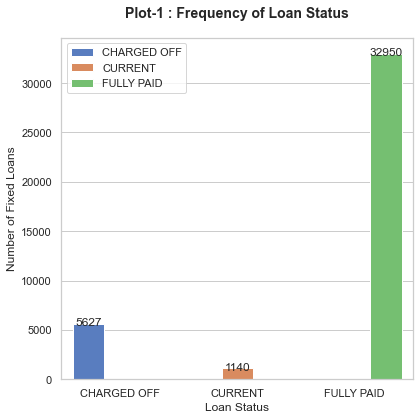

In [53]:
#Univariate Analaysis - Plot-1 
# Loan Status category Counts

# Set up the matplotlib figure
plt.figure(figsize=(6,6))

# Draw bar plot for counts.
ax1 = sns.barplot(data=loan_status_percent,x="loan_status", y="id",hue='loan_status')
                         
# Customize,Title,legends,annotations for subplot -1
ax1.set_title('Plot-1 : Frequency of Loan Status',
               fontdict={'fontsize':14,'fontweight':'bold'},loc='center',
                pad=20) 
ax1.set(ylabel='Number of Fixed Loans', xlabel='Loan Status')
ax1.legend()

#Annotations.
#Annotations.
for p in ax1.patches:
    height,width =p.get_height(),(p.get_x() + p.get_width() / 2.)
    if (~np.isnan(height)):
        ax1.annotate('{:.0f}'.format(height),(width, height+100),
                     ha='center', va='center')

# Draw plots
plt.tight_layout()
plt.show();

In [54]:
# pie charts instead of a count plots
def pie_chart(dataframe,col,Title):
    """
    creates a pie chart
    input: dataframe with a 'category' as index and a numerical column
    output: pie chart
    """
    labels = dataframe.index.values
    sizes = dataframe[col].values
        
    fig1, ax1 = plt.subplots()
    ax1.set_title(Title,fontdict={'fontsize':14,'fontweight':'bold'},loc='center',pad=20)
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show();
    
#Overall Loan Status Percentage across loan applicants

loan_status = pd.DataFrame(loan.loan_status.value_counts())
loan_status

,loan_status
FULLY PAID,32950
CHARGED OFF,5627
CURRENT,1140


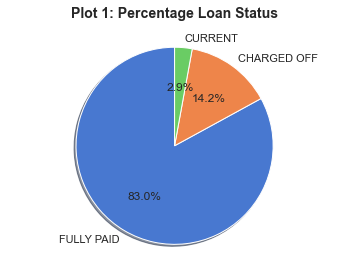

In [55]:
#Univariate Analaysis - Plot-1
# Loan Status category Counts

pie_chart(loan_status,'loan_status',"Plot 1: Percentage Loan Status")

,term
36 MONTHS,3227
60 MONTHS,2400


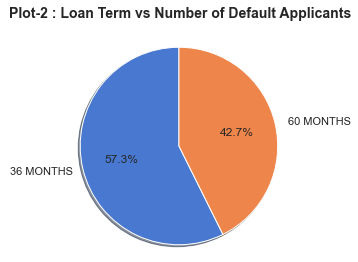

In [57]:
# Univariate Analysis - Plot-2
# Loan Term vs Charged Off Loan Counts.
default_term = pd.DataFrame(chargedoff_loan.term.value_counts())
default_term
pie_chart(default_term,'term',"Plot-2 : Loan Term vs Number of Default Applicants")

In [58]:
#Analysis of LC Assigned grade versus Count of Charged-Off Loans - Plot-3

default_grade = chargedoff_loan.grade.value_counts().reset_index()
default_grade

,index,grade
0,B,1425
1,C,1347
2,D,1118
3,E,715
4,A,602
5,F,319
6,G,101


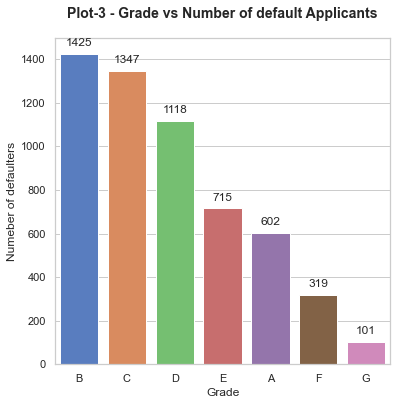

In [59]:
# LC Assigned grade versus Count of Charged-Off Loans

f, ax = plt.subplots(figsize=(6, 6))
ax = sns.barplot(x='index',y='grade',data=default_grade)
Title='Plot-3 - Grade vs Number of default Applicants'
ax.set_title(Title,fontdict={'fontsize':14,'fontweight':'bold'},loc='center',pad=20)
ax.set_xlabel("Grade")
ax.set_ylabel("Numeber of defaulters")

#Annotations.
for p in ax.patches:
    height,width =p.get_height(),(p.get_x() + p.get_width() / 2.)
    if (~np.isnan(height)):
        ax.annotate('{:.0f}'.format(height),(width, height+50),
                     ha='center', va='center')
        
plt.show();

In [60]:
#Analysis of LC Assigned sub-grade versus Number of default customer loans - Plot - 4
default_subgrade = chargedoff_loan.sub_grade.value_counts().reset_index()
default_subgrade

,index,sub_grade
0,B5,356
1,B3,341
2,C1,336
3,B4,329
4,C2,321
5,D2,271
6,C3,270
7,D3,256
8,B2,228
9,A5,217


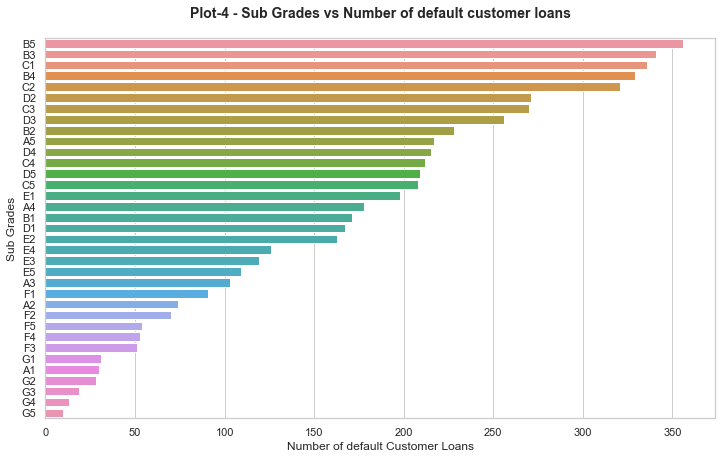

In [61]:
# LC Assigned Sub grades versus Count of Charged-Off Loans

f, ax = plt.subplots(figsize=(12, 7))
ax = sns.barplot(x='sub_grade',y='index',orient='h',data=default_subgrade)
Title='Plot-4 - Sub Grades vs Number of default customer loans'
ax.set_title(Title,fontdict={'fontsize':14,'fontweight':'bold'},loc='center',pad=20)
ax.set_xlabel("Number of default Customer Loans")
ax.set_ylabel("Sub Grades")
       
plt.show();

In [62]:
# Plot-5 - Analyse the Employee Experience versus Number of Default Applicants (Charged off Loans).
default_emp_length =  chargedoff_loan.emp_length.value_counts().reset_index()
default_emp_length

,index,emp_length
0,10+ YEARS,1331
1,< 1 YEAR,639
2,2 YEARS,567
3,3 YEARS,555
4,4 YEARS,462
5,5 YEARS,458
6,1 YEAR,456
7,6 YEARS,307
8,7 YEARS,263
9,8 YEARS,203


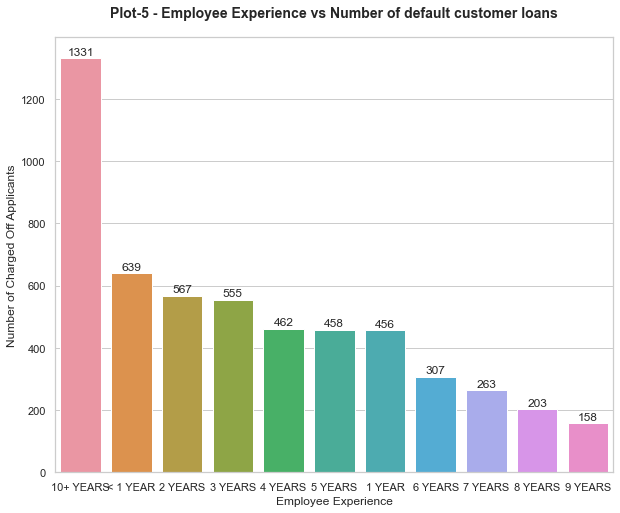

In [63]:
# Analysis of Employment Experience versus Number of default loanss

f, ax = plt.subplots(figsize=(10, 8))
ax = sns.barplot(x='index',y='emp_length',data=default_emp_length)
Title='Plot-5 - Employee Experience vs Number of default customer loans'
ax.set_title(Title,fontdict={'fontsize':14,'fontweight':'bold'},loc='center',pad=20)
ax.set_xlabel("Employee Experience")
ax.set_ylabel("Number of Charged Off Applicants")
#Annotations.
for p in ax.patches:
    height,width =p.get_height(),(p.get_x() + p.get_width() / 2.)
    if (~np.isnan(height)):
        ax.annotate('{:.0f}'.format(height),(width, height+20),
                     ha='center', va='center')
        
plt.show();

In [64]:
#Analysis of Customer Home ownership versus Number of default loans - Plot-6
default_home_ownership = chargedoff_loan.home_ownership.value_counts().reset_index()
default_home_ownership['percentage'] = 100 * (default_home_ownership.home_ownership/
                                              default_home_ownership.home_ownership.sum())
default_home_ownership

,index,home_ownership,percentage
0,RENT,2839,50.45
1,MORTGAGE,2327,41.35
2,OWN,443,7.87
3,OTHER,18,0.32


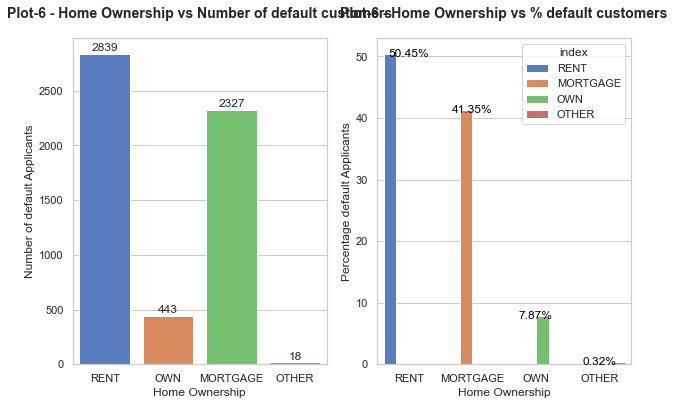

In [66]:
# Analysis of Customer Home ownersip versus default Loan Status.

f, axarr = plt.subplots(1,2,figsize=(10,6))
ax1 = sns.countplot(x="home_ownership",\
                      data = chargedoff_loan,ax=axarr[0])
Title='Plot-6 - Home Ownership vs Number of default customers'
ax1.set_title(Title,fontdict={'fontsize':14,'fontweight':'bold'},loc='center',pad=20)
ax1.set_xlabel("Home Ownership")
ax1.set_ylabel("Number of default Applicants")

#Annotations.
for p in ax1.patches:
    height,width =p.get_height(),(p.get_x() + p.get_width() / 2.)
    if (~np.isnan(height)):
        ax1.annotate('{:.0f}'.format(height),(width, height+50),
                     ha='center', va='center')
        
# Percentage wise Home ownership against Default Loan Status.
# Plot-3 - Univariate Analysis - Loan Term vs Charged Off Loan Counts.

ax2 = sns.barplot(x='index',y='percentage',hue='index',\
                   data=default_home_ownership,ax=axarr[1])
Title='Plot-6 - Home Ownership vs % default customers'
ax2.set_title(Title,fontdict={'fontsize':14,'fontweight':'bold'},loc='center',pad=20)
ax2.set_xlabel("Home Ownership")
ax2.set_ylabel("Percentage default Applicants")

#Annotations.
for index,row in default_home_ownership.iterrows():
    ax2.text(x=row.name,y=row.percentage,s='{:}%'.format(round(row.percentage,2)),\
                                       color='black',ha='center',va='center')
    
plt.show();    

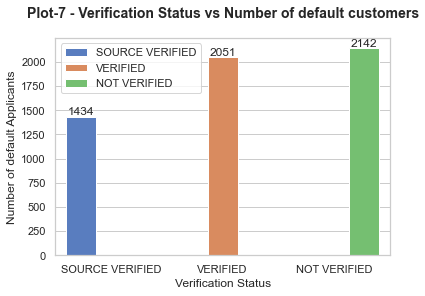

In [68]:
# Analyse the Verification Status versus Number of Default Applicants (Charged off Loans).
chargedoff_loan.verification_status.value_counts()
ax =sns.countplot(x="verification_status",hue = 'verification_status',\
                                     data = chargedoff_loan,palette='muted')
Title='Plot-7 - Verification Status vs Number of default customers'
ax.set_title(Title,fontdict={'fontsize':14,'fontweight':'bold'},loc='center',pad=20)
ax.set_xlabel("Verification Status")
ax.set_ylabel("Number of default Applicants")
ax.legend(loc=2)

#Annotations.
#Annotations.
for p in ax.patches:
    height,width =p.get_height(),(p.get_x() + p.get_width() / 2.)
    if (~np.isnan(height)):
        ax.annotate('{:.0f}'.format(height),(width, height+50),
                     ha='center', va='center')
        
plt.show();

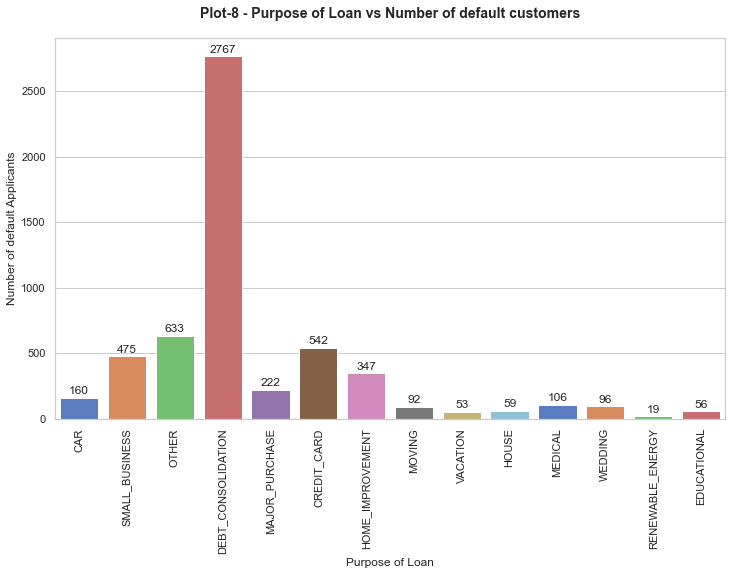

In [70]:
# Plot-8 - Analyse Purpose versus Number of Default Applicants
chargedoff_loan.purpose.value_counts()
f, ax = plt.subplots(figsize=(12, 7))
ax =sns.countplot(x="purpose",data = chargedoff_loan,palette='muted')
Title='Plot-8 - Purpose of Loan vs Number of default customers'
ax.set_title(Title,fontdict={'fontsize':14,'fontweight':'bold'},loc='center',pad=20)
ax.set_xlabel("Purpose of Loan")
ax.set_ylabel("Number of default Applicants")
#ax.legend(loc='center right', bbox_to_anchor=(1.46, 0.92), ncol=1)

for item in ax.get_xticklabels():
    item.set_rotation(90)

#Annotations.
for p in ax.patches:
    height,width =p.get_height(),(p.get_x() + p.get_width() / 2.)
    if (~np.isnan(height)):
        ax.annotate('{:.0f}'.format(height),(width, height+50),
                     ha='center', va='center')
        
plt.show();

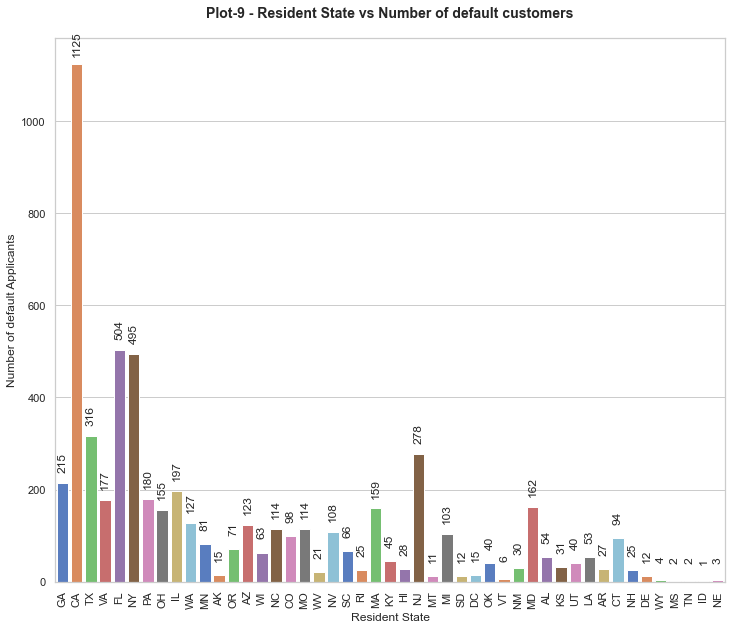

In [72]:
# Univariate Analaysis - Plot-9
# Analysis of Applicant Residence State Vs Count of Charged-Off Loans
f, ax = plt.subplots(figsize=(12, 10))
ax =sns.countplot(x="addr_state",data = chargedoff_loan,palette='muted')
Title='Plot-9 - Resident State vs Number of default customers'
ax.set_title(Title,fontdict={'fontsize':14,'fontweight':'bold'},loc='center',pad=20)
ax.set_xlabel("Resident State")
ax.set_ylabel("Number of default Applicants")

for item in ax.get_xticklabels():
    item.set_rotation(90)

#Annotations.
for p in ax.patches:
    height,width =p.get_height(),p.get_x()
    if (~np.isnan(height)):
        ax.annotate("{:.0f}".format(height), 
                            (p.get_x() + p.get_width() / 2.,
                            p.get_height()),
                            ha='center', va='center', rotation=90, 
                            xytext=(0, 20), textcoords='offset points') 
               
plt.show();

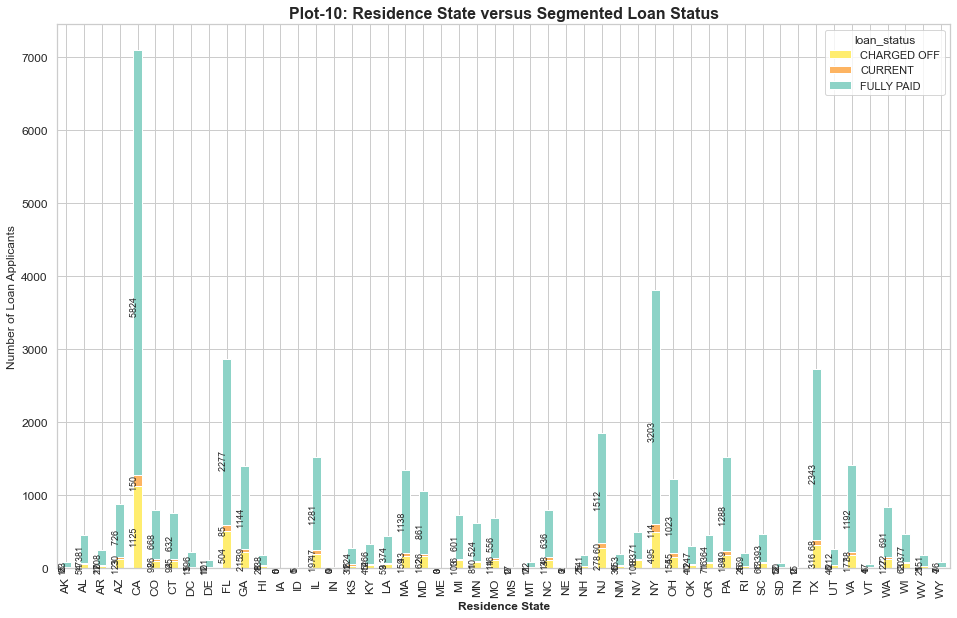

In [73]:
# Univariate Analaysis - Plot-10
# Analysis of Applicant Residence State Vs Count of Charged-Off and fully paid Loans
df_addr_state = loan.groupby(['loan_status','addr_state'])['id']\
                    .count().unstack('loan_status')
ax = df_addr_state.plot(kind='bar',
             stacked=True,
             grid=True,
             figsize=(16,10),
             colormap=plt.cm.Set3_r,
             #colormap='GnBu',
             fontsize=12)

# Set the Title for the plot.

titlefonts = {'fontsize':16,'fontweight':'bold'}
ax.set_title("Plot-10: Residence State versus Segmented Loan Status",
                   fontdict=titlefonts)

# Set the labels to the stacked bars.

fonts= {'fontsize':12,'fontweight':'bold'}
ax.set_ylabel("Number of Loan Applicants",fontsize=12)
ax.set_xlabel("Residence State",fontdict=fonts)
ax.get_legend().set_bbox_to_anchor((1.0, 1.0))


# Annotate the stacked bar plot

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    label = ax.annotate('{:.0f} '.format(height), 
                (p.get_x()+.15*width, 
                 p.get_y()+.4*height),
                 rotation=90,ha='center',va='center',)
    label.set_fontsize(9)

# Display the Stacked Bar Plot.
plt.show();

In [74]:
# Plot-11 - Loan Amount Analysis
# Continuous Numerical Variable -  Loan Amount 
# percentile list 
perc =[.20,.25, .40, .60, .75,.80,.90,.95] 
loan_filtered.loan_amnt.describe(percentiles=perc)

count   38,577.00
mean    11,047.03
std      7,348.44
min        500.00
20%      5,000.00
25%      5,300.00
40%      7,750.00
50%      9,600.00
60%     11,200.00
75%     15,000.00
80%     16,000.00
90%     21,600.00
95%     25,000.00
max     35,000.00
Name: loan_amnt, dtype: float64

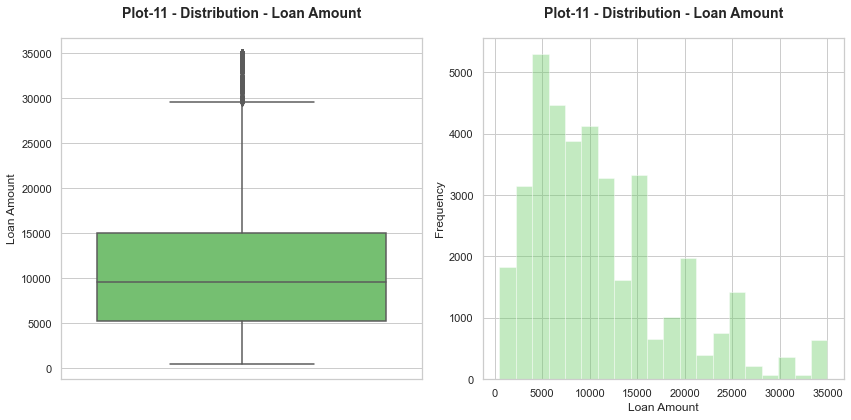

In [75]:
# Continuous Numerical Variable -  loan Amount distribution
f, axn = plt.subplots(1,2,figsize=(12,6))

# Boxplot 

ax1 = sns.boxplot(y=loan_filtered.loan_amnt,color='g',ax=axn[0])
Title='Plot-11 - Distribution - Loan Amount'
ax1.set_title(Title,fontdict={'fontsize':14,'fontweight':'bold'},loc='center',pad=20)
ax1.set_ylabel("Loan Amount")


# Histogram 
# Ignoring the outliers - that is above 95% for the bins
ax2 = sns.distplot(loan_filtered.loan_amnt,bins=20,
                   rug=False,
                   kde=False,
                   color='g',
                   ax=axn[1])

ax2.set_xlabel("Loan Amount")
ax2.set_ylabel("Frequency")
Title='Plot-11 - Distribution - Loan Amount'
ax2.set_title(Title,fontdict={'fontsize':14,'fontweight':'bold'},loc='center',pad=20)

plt.tight_layout()
plt.show();

In [76]:
# Plot-12 - Funded Amount Analysis
perc =[.20,.25, .40, .60,.75, .80,.90,.95] 
loan_filtered.funded_amnt.describe(percentiles=perc)

count   38,577.00
mean    10,784.06
std      7,090.31
min        500.00
20%      5,000.00
25%      5,200.00
40%      7,500.00
50%      9,550.00
60%     10,875.00
75%     15,000.00
80%     16,000.00
90%     20,000.00
95%     25,000.00
max     35,000.00
Name: funded_amnt, dtype: float64

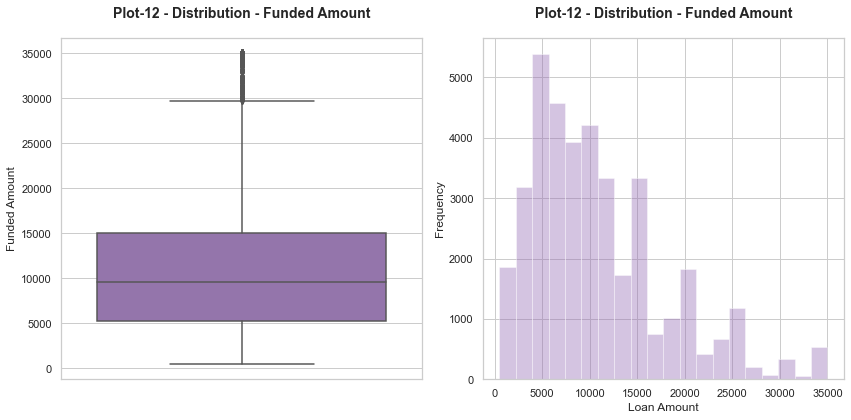

In [79]:
f, axn = plt.subplots(1,2,figsize=(12,6))
Title='Plot-12 - Distribution - Funded Amount'

# Boxplot 
ax1 = sns.boxplot(y=loan_filtered.funded_amnt,ax=axn[0],color='m')
ax1.set_title(Title,fontdict={'fontsize':14,'fontweight':'bold'},loc='center',pad=20)
ax1.set_ylabel("Funded Amount")

# Histogram 
ax2 = sns.distplot(loan_filtered.funded_amnt,bins=20,
                   rug=False,
                   kde=False,
                   color='m',
                   ax=axn[1])

ax2.set_xlabel("Loan Amount")
ax2.set_ylabel("Frequency")
ax2.set_title(Title,fontdict={'fontsize':14,'fontweight':'bold'},loc='center',pad=20)
plt.tight_layout()
plt.show();

In [80]:
# Plot-13 - Funded Amount Invested Analysis
perc =[.20, .25, .40, .60,.75, .80,.90,.95] 
loan_filtered.funded_amnt_inv.describe(percentiles=perc)

count     38577
unique     8050
top        5000
freq       1294
Name: funded_amnt_inv, dtype: object

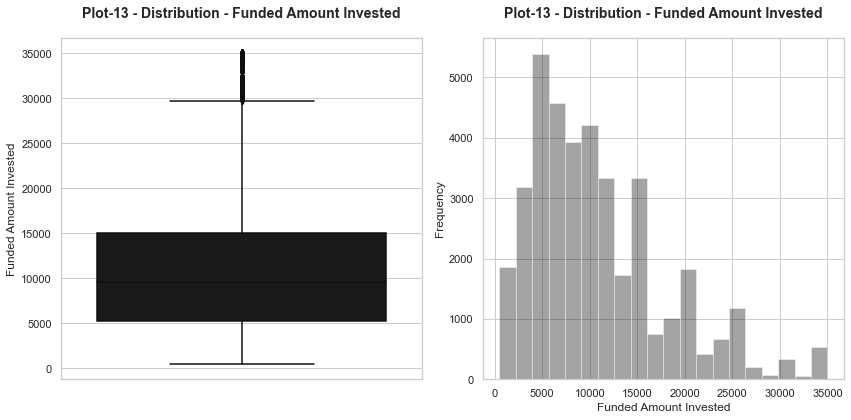

In [82]:
f, axn = plt.subplots(1,2,figsize=(12,6))
Title='Plot-13 - Distribution - Funded Amount Invested'

# Boxplot 
ax1 = sns.boxplot(y=loan_filtered.funded_amnt,ax=axn[0],color='k')
ax1.set_title(Title,fontdict={'fontsize':14,'fontweight':'bold'},loc='center',pad=20)
ax1.set_ylabel("Funded Amount Invested")

# Histogram 
ax2 = sns.distplot(loan_filtered.funded_amnt,bins=20,
                   rug=False,
                   kde=False,
                   color='k',
                   ax=axn[1])

ax2.set_xlabel("Funded Amount Invested")
ax2.set_ylabel("Frequency")
ax2.set_title(Title,fontdict={'fontsize':14,'fontweight':'bold'},loc='center',pad=20)
plt.tight_layout()
plt.show();

In [110]:
loan_issue_year = pd.DataFrame(loan_filtered.issue_d.dt.year)

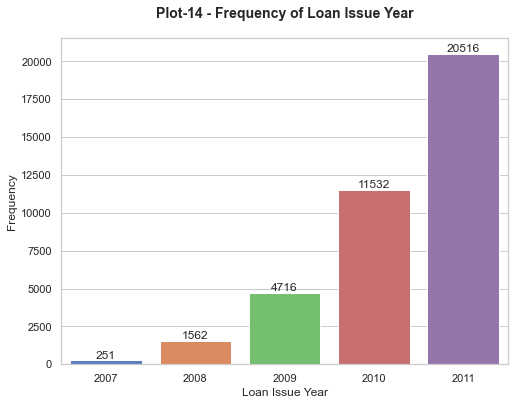

In [114]:
# Univariate Analaysis - Plot-14
# Continuous Numerical Variable -  Issue Date
# Issue_d - The month and year which the loan was funded

f, ax = plt.subplots(figsize=(8,6))
ax =sns.countplot(x="issue_d",data = loan_issue_year,palette='muted')
Title='Plot-14 - Frequency of Loan Issue Year'
ax.set_title(Title,fontdict={'fontsize':14,'fontweight':'bold'},loc='center',pad=20)
ax.set_xlabel("Loan Issue Year")
ax.set_ylabel("Frequency")

#for item in ax.get_xticklabels():
#    item.set_rotation(90)

#Annotations.
for p in ax.patches:
    height,width =p.get_height(),p.get_x()
    if (~np.isnan(height)):
        ax.annotate("{:.0f}".format(height), 
                            (p.get_x() + p.get_width() / 2.,
                            p.get_height()),
                            ha='center', va='center', 
                            xytext=(0, 5), textcoords='offset points') 
               
plt.show();

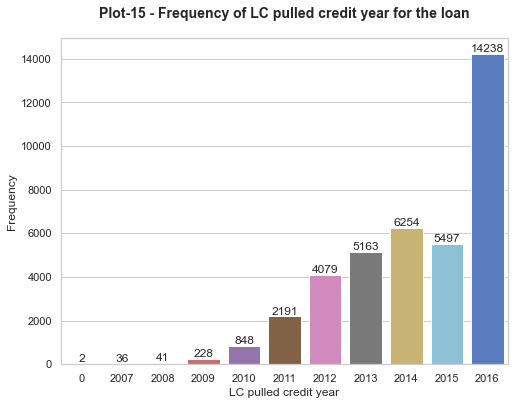

In [115]:
# Plot-15 - LC pulled credit year for the loan Analysis
loan_credit_pull_year = pd.DataFrame(loan_filtered.last_credit_pull_d.dt.year)
loan_credit_pull_year = loan_credit_pull_year.last_credit_pull_d.fillna(0).astype(int).reset_index()
f, ax = plt.subplots(figsize=(8,6))
ax =sns.countplot(x="last_credit_pull_d",data = loan_credit_pull_year,palette='muted')
Title='Plot-15 - Frequency of LC pulled credit year for the loan'
ax.set_title(Title,fontdict={'fontsize':14,'fontweight':'bold'},loc='center',pad=20)
ax.set_xlabel("LC pulled credit year")
ax.set_ylabel("Frequency")

#for item in ax.get_xticklabels():
#    item.set_rotation(90)

#Annotations.
for p in ax.patches:
    height,width =p.get_height(),p.get_x()
    if (~np.isnan(height)):
        ax.annotate("{:d}".format(height), 
                            (p.get_x() + p.get_width() / 2.,
                            p.get_height()),
                            ha='center', va='center', 
                            xytext=(0, 5), textcoords='offset points') 
               
plt.show();

In [116]:
# Plot-16 - Last Credit Payment Year Analysis for the loan Analysis
# Filter out years for last_pymnt_d 
last_credit_pymnt_year = pd.DataFrame(loan_filtered.last_pymnt_d.dt.year)
last_credit_pymnt_year = last_credit_pymnt_year.last_pymnt_d.fillna(0).astype(int).reset_index()

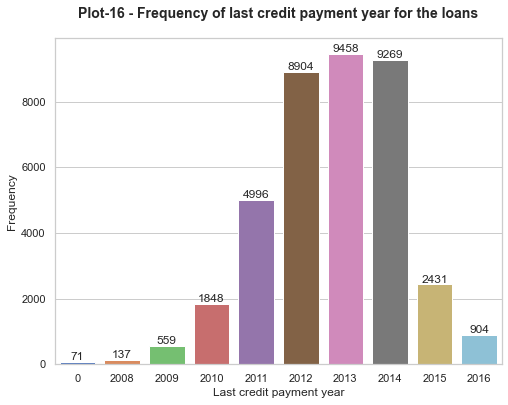

In [118]:
f, ax = plt.subplots(figsize=(8,6))
ax =sns.countplot(x="last_pymnt_d",data = last_credit_pymnt_year,palette='muted')
Title='Plot-16 - Frequency of last credit payment year for the loans'
ax.set_title(Title,fontdict={'fontsize':14,'fontweight':'bold'},loc='center',pad=20)
ax.set_xlabel("Last credit payment year")
ax.set_ylabel("Frequency")

#for item in ax.get_xticklabels():
#    item.set_rotation(90)

#Annotations.
for p in ax.patches:
    height,width =p.get_height(),p.get_x()
    if (~np.isnan(height)):
        ax.annotate("{:d}".format(height), 
                            (p.get_x() + p.get_width() / 2.,
                            p.get_height()),
                            ha='center', va='center', 
                            xytext=(0, 5), textcoords='offset points') 
               
plt.show();

In [134]:
### Bivariate Analysis
# Genric Functions for annotations.
def annotations(ax,textoffset,raxis):
    for p in ax.patches:
        height,width =p.get_height(),p.get_x()
        if (~np.isnan(height)):
            ax.annotate("{:.0f}".format(height), 
                       (p.get_x() + p.get_width() / 2.,
                        p.get_height()),
                        ha='center', va='center', rotation=raxis, 
                        xytext=(0, textoffset), textcoords='offset points') 

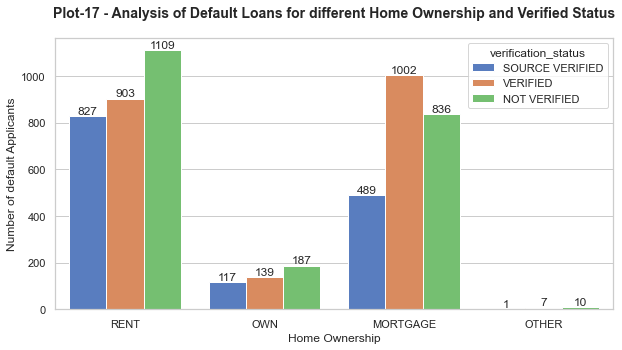

In [135]:
# Plot-17 - Analaysis of Home Ownership and verified status for the defaulted Loans.
f, ax = plt.subplots(figsize=(10, 5))
ax =sns.countplot(x="home_ownership",hue='verification_status',data = chargedoff_loan,palette='muted')
Title='Plot-17 - Analysis of Default Loans for different Home Ownership and Verified Status'
ax.set_title(Title,fontdict={'fontsize':14,'fontweight':'bold'},loc='center',pad=20)
ax.set_xlabel("Home Ownership")
ax.set_ylabel("Number of default Applicants")

#for item in ax.get_xticklabels():
#    item.set_rotation(90)


#Annotations.
annotations(ax,5,0)       
plt.show();

In [169]:
#Plot-18 - Analysis of Annual Income Group against the Number of Default Loans
chargedoff_loan = chargedoff_loan.assign(range=pd.cut(loan_filtered['annual_inc'],\
                    [0,5000,15000,30000,60000,80000,120000,200000,500000,1250000],
                    labels=['Least income','Less Income','low_average','average','upper_average',\
                            'high','higher','upperhigher','highest'] ))

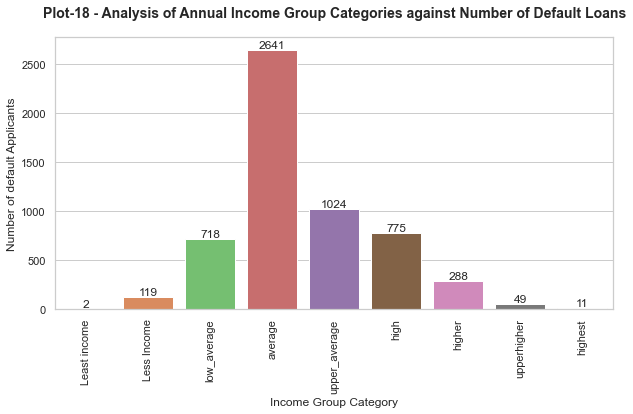

In [200]:
# Bivariate Analaysis Plot-18
# Analysis of Income Bin Against of Charged-Off Loans

f, ax = plt.subplots(figsize=(10, 5))
ax =sns.countplot(x="range",data = chargedoff_loan,palette='muted')
Title='Plot-18 - Analysis of Annual Income Group Categories against Number of Default Loans'
ax.set_title(Title,fontdict={'fontsize':14,'fontweight':'bold'},loc='center',pad=20)
ax.set_xlabel("Income Group Category")
ax.set_ylabel("Number of default Applicants")

for item in ax.get_xticklabels():
    item.set_rotation(90)

    #Annotations.
annotations(ax,5,0)
plt.show();

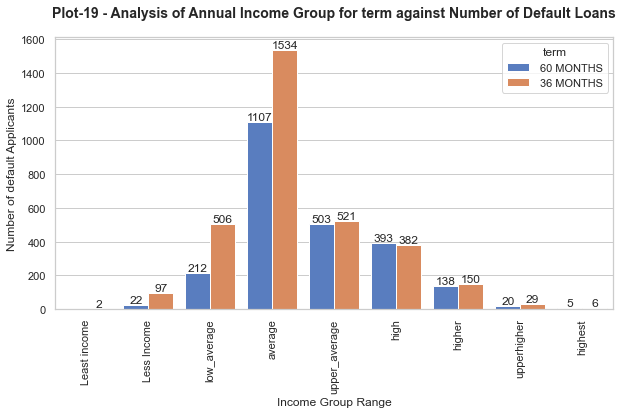

In [201]:
# Plot-19- Analysis of Annual Income Group for the term against Number of default Loans
f, ax = plt.subplots(figsize=(10, 5))
ax =sns.countplot(x="range",hue='term',data = chargedoff_loan,palette='muted')
Title='Plot-19 - Analysis of Annual Income Group for term against Number of Default Loans'
ax.set_title(Title,fontdict={'fontsize':14,'fontweight':'bold'},loc='center',pad=20)
ax.set_xlabel("Income Group Range")
ax.set_ylabel("Number of default Applicants")

for item in ax.get_xticklabels():
    item.set_rotation(90)


#Annotations.
annotations(ax,5,0)

plt.show();

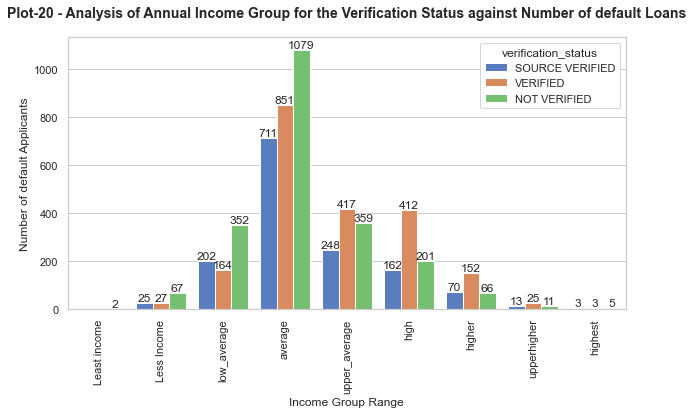

In [202]:
# Plot-20- Analysis of Annual Income Group for the Verification Status against Number of default Loans
f, ax = plt.subplots(figsize=(10, 5))
ax =sns.countplot(x="range",hue='verification_status',data = chargedoff_loan,palette='muted')
Title='Plot-20 - Analysis of Annual Income Group for the Verification Status against Number of default Loans'
ax.set_title(Title,fontdict={'fontsize':14,'fontweight':'bold'},loc='center',pad=20)
ax.set_xlabel("Income Group Range")
ax.set_ylabel("Number of default Applicants")

for item in ax.get_xticklabels():
    item.set_rotation(90)


#Annotations.
annotations(ax,5,0)             
plt.show();

In [181]:
# Plot- 21- Analysis of Interest Rate Bin Category versus Term loans for default loans.
chargedoff_loan['int_rate'] = chargedoff_loan['int_rate'].str.rstrip('%')
columns = ['int_rate']
chargedoff_loan[columns] = chargedoff_loan[columns].astype(np.float)
chargedoff_loan = chargedoff_loan.assign( 
    int_category = pd.cut(
        chargedoff_loan.int_rate,
        [-1, 10, 18, 25],
        labels=['Low', 'Medium', 'High']))

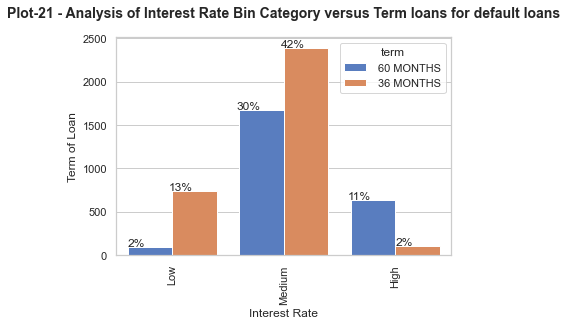

In [203]:

ax =sns.countplot(x="int_category",hue='term',data = chargedoff_loan,palette='muted')
Title='Plot-21 - Analysis of Interest Rate Bin Category versus Term loans for default loans'
ax.set_title(Title,fontdict={'fontsize':14,'fontweight':'bold'},loc='center',pad=20)
ax.set_xlabel("Interest Rate")
ax.set_ylabel("Term of Loan")

for item in ax.get_xticklabels():
    item.set_rotation(90)

#Annotations.
total = float(len(chargedoff_loan))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+ p.get_width()/5.,
            height + 9,
            '{0:.0%}'.format(height/total),
            ha="center") 
               
plt.show();

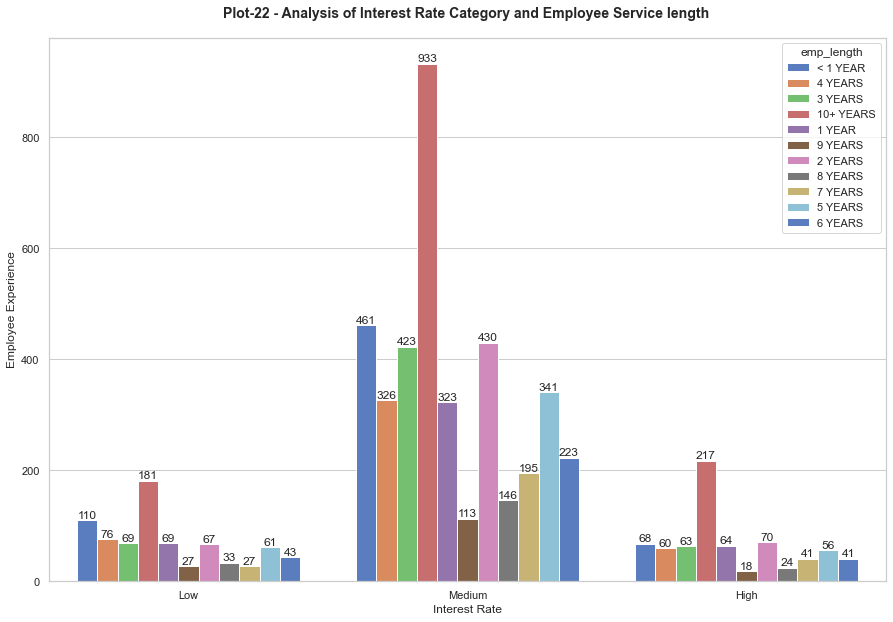

In [204]:
# Plot- 22 - Analysis of Interest Rate bin category versus Employee experience for default loans.
plt.figure(figsize=(15, 10))
ax =sns.countplot(x="int_category",hue='emp_length',data = chargedoff_loan,palette='muted')
Title='Plot-22 - Analysis of Interest Rate Category and Employee Service length '
ax.set_title(Title,fontdict={'fontsize':14,'fontweight':'bold'},loc='center',pad=20)
ax.set_xlabel("Interest Rate")
ax.set_ylabel("Employee Experience")

#Annotations.
annotations(ax,5,0)
              
plt.show(); 

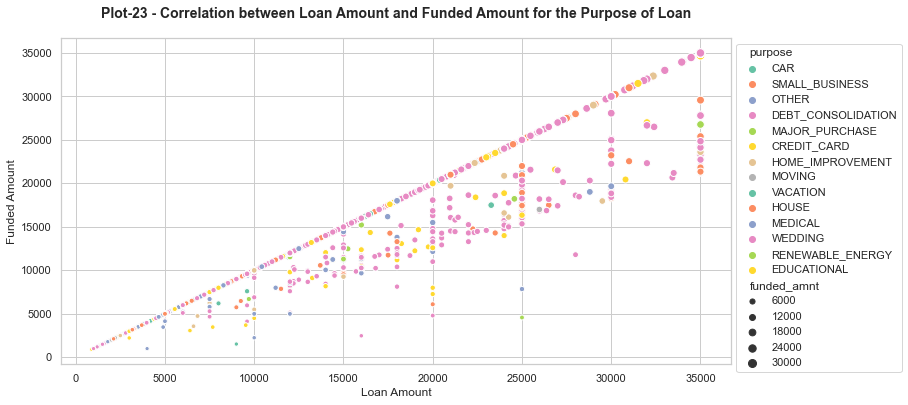

In [205]:
# Plot-23 - Correlation Analysis - Loan Amount against Funded Amount for the purpose of the charged off Loans.
plt.figure(figsize=(12,6))
ax = sns.scatterplot(x="loan_amnt", y="funded_amnt",hue='purpose',size='funded_amnt',palette='Set2',
                     linewidth=1,data=chargedoff_loan)
ax.get_legend().set_bbox_to_anchor((1.0, 1.0))

Title='Plot-23 - Correlation between Loan Amount and Funded Amount for the Purpose of Loan'
ax.set_title(Title,fontdict={'fontsize':14,'fontweight':'bold'},loc='center',pad=20)
ax.set_xlabel("Loan Amount")
ax.set_ylabel("Funded Amount")

plt.show();

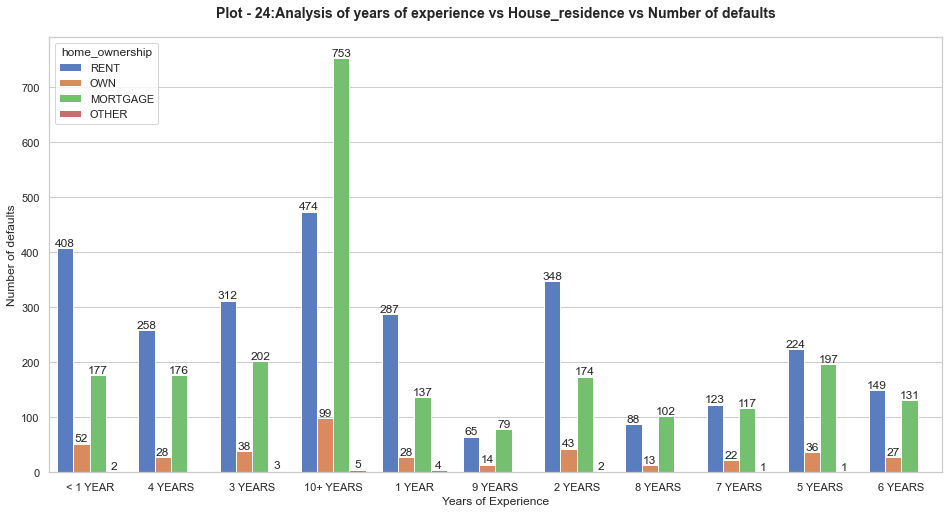

In [206]:
# Plot - 24:Analysis of years of experience vs House_residence vs Number of defaults
plt.figure(figsize=(16,8))

ax = sns.countplot(x="emp_length",hue = "home_ownership",data = chargedoff_loan)
Title='Plot - 24:Analysis of years of experience vs House_residence vs Number of defaults'
ax.set_title(Title,fontdict={'fontsize':14,'fontweight':'bold'},loc='center',pad=20)
ax.set_xlabel("Years of Experience")
ax.set_ylabel("Number of defaults")
#Annotations.
annotations(ax,5,0)
plt.show();


In [207]:
chargedoff_loan = chargedoff_loan.assign(range=pd.cut(loan_filtered['annual_inc'],[0,5000,15000,30000,60000,80000,120000,200000,500000,1250000],
                    labels=['Least income','Less Income','low_average','average','upper_average','high','higher','upperhigher','highest'] ))

<Figure size 1152x576 with 0 Axes>

Text(0.5, 1.0, 'Plot - 25:Analysis of Annual Income vs Number of defaults')

Text(0.5, 0, 'Income Range')

Text(0, 0.5, 'Number of defaults')

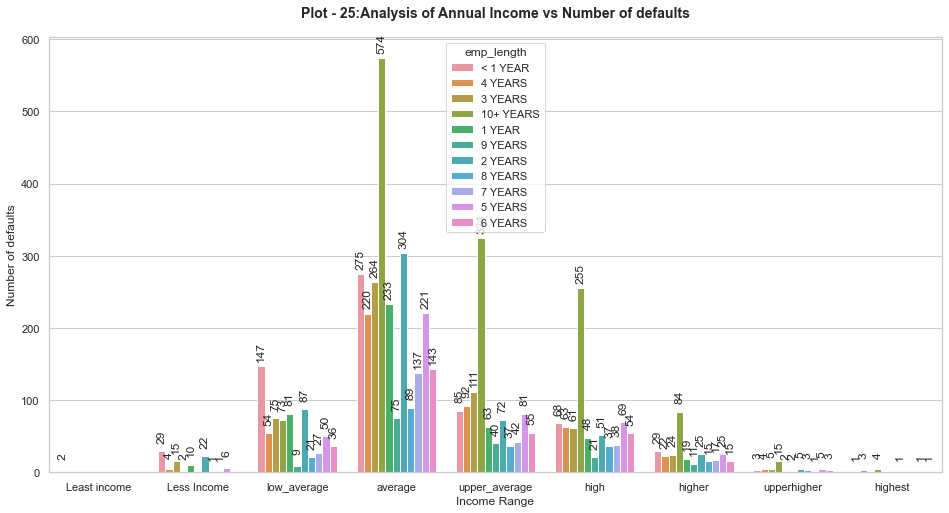

In [209]:
plt.figure(figsize=(16,8))

ax = sns.countplot(x="range",hue = "emp_length",data = chargedoff_loan)
Title='Plot - 25:Analysis of Annual Income vs Number of defaults'
ax.set_title(Title,fontdict={'fontsize':14,'fontweight':'bold'},loc='center',pad=20)
ax.set_xlabel("Income Range")
ax.set_ylabel("Number of defaults")
#Annotations.
annotations(ax,15,90)
plt.show()

In [159]:
columns = ['annual_inc']
loan_filtered[columns] = loan_filtered[columns].astype(np.float)


Text(0.5, 1.0, 'Plot - 26:Analysis of Annual Income vs Number of public record bankruptcies')

Text(0, 0.5, 'Annual income')

Text(0.5, 0, 'Number of public record bankruptcies')

(array([0, 1, 2]), [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2')])

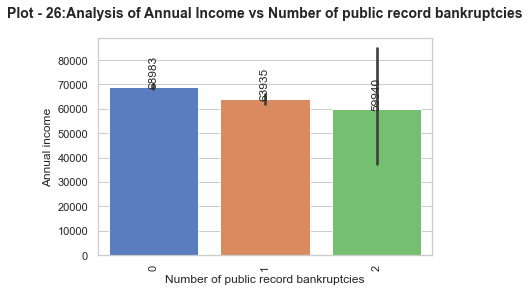

In [214]:
#26:Analysis of Annual Income vs Number of public record bankruptcies
ax = sns.barplot(y='annual_inc', x='pub_rec_bankruptcies', data=loan_filtered)
Title='Plot - 26:Analysis of Annual Income vs Number of public record bankruptcies'
ax.set_title(Title,fontdict={'fontsize':14,'fontweight':'bold'},loc='center',pad=20)
ax.set_ylabel("Annual income")
ax.set_xlabel("Number of public record bankruptcies")
annotations(ax,15,90)
plt.xticks(rotation=90)
plt.show()

In [165]:
columns = ['annual_inc','loan_amnt', 'funded_amnt','funded_amnt_inv', 'installment', 'annual_inc', 'dti', 
          'revol_bal', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
          'total_rec_late_fee', 'recoveries', 'collection_recovery_fee']
loan_filtered[columns] = loan_filtered[columns].astype(np.float)

<Figure size 720x720 with 0 Axes>

<AxesSubplot:>

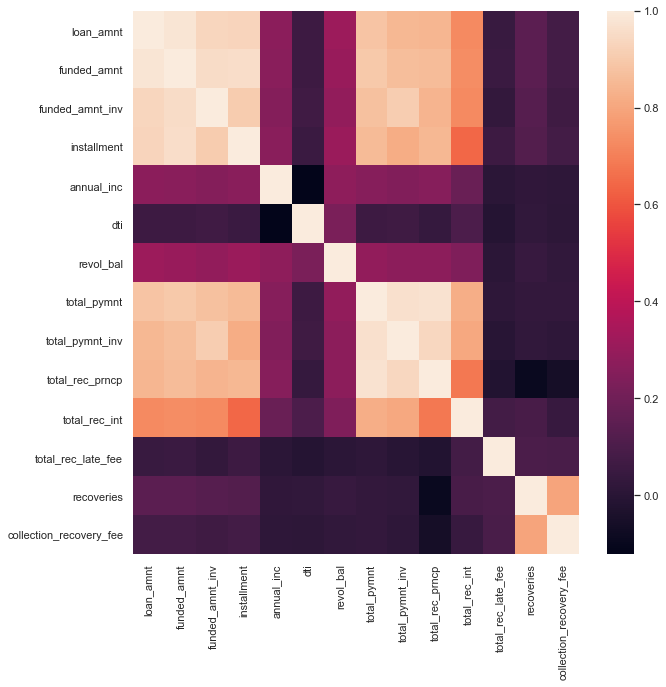

In [192]:
#Plot-27 Bivariate Correlation Analysis.
plt.figure(figsize=(10,10))
sns.heatmap(loan_filtered.corr())
plt.show()

In [167]:
chargedoff_loan = chargedoff_loan.assign(range=pd.cut(loan_filtered['annual_inc'],[0,5000,15000,30000,60000,80000,120000,200000,500000,1250000],
                    labels=['Least income','Less Income','low_average','average','upper_average','high','higher','upperhigher','highest'] ))

<Figure size 1152x576 with 0 Axes>

Text(0.5, 1.0, 'Plot - 28:Analysis of Annual Income vs Number of defaults')

Text(0.5, 0, 'Income Range')

Text(0, 0.5, 'Number of defaults')

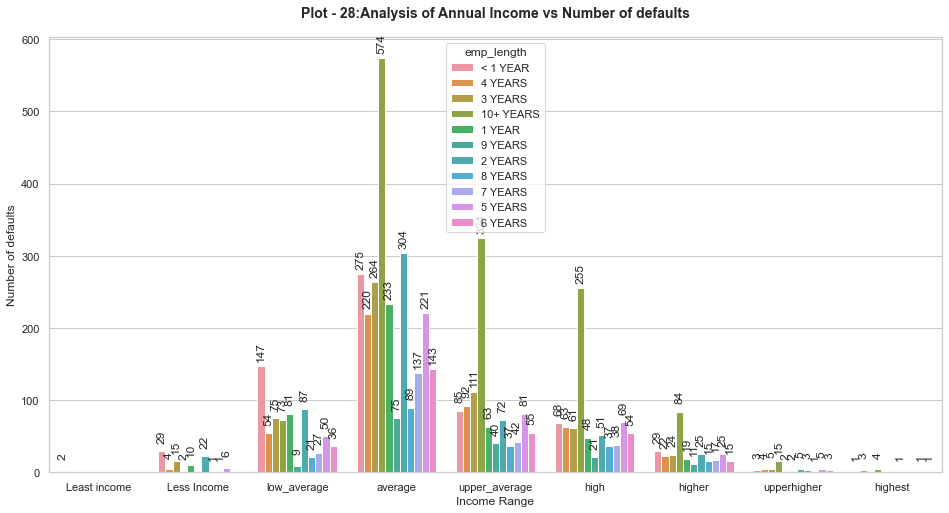

In [215]:
#28:Analysis of Annual Income vs Number of defaults'
plt.figure(figsize=(16,8))

ax = sns.countplot(x="range",hue = "emp_length",data = chargedoff_loan)
Title='Plot - 28:Analysis of Annual Income vs Number of defaults'
ax.set_title(Title,fontdict={'fontsize':14,'fontweight':'bold'},loc='center',pad=20)
ax.set_xlabel("Income Range")
ax.set_ylabel("Number of defaults")
#Annotations.
annotations(ax,15,90)
plt.show()

<AxesSubplot:xlabel='loan_status', ylabel='funded_amnt'>

Text(0.5, 1.0, 'Plot-28: Loan Amount granted less than 7 lakhs')

Text(0.5, 0, 'Loan Status')

Text(0, 0.5, 'Loan Amount Granted')

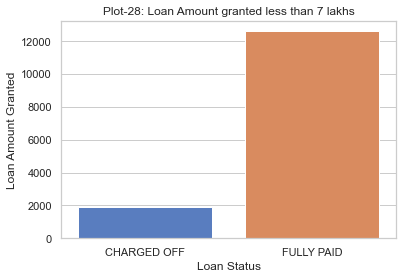

In [217]:
#28 - Loan Amount granted less than 7 lakhs
df_agg = loan_filtered[loan_filtered['funded_amnt'] <= 7000].groupby(['loan_status'])['funded_amnt'].count().reset_index()
sns.barplot(x='loan_status', y='funded_amnt', data=df_agg)
plt.title('Plot-28: Loan Amount granted less than 7 lakhs')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount Granted')
plt.show()

<AxesSubplot:xlabel='loan_status', ylabel='funded_amnt'>

Text(0.5, 1.0, 'Loan Amount granted more than 7 lakhs')

Text(0.5, 0, 'Loan Status')

Text(0, 0.5, 'Loan Amount Granted')

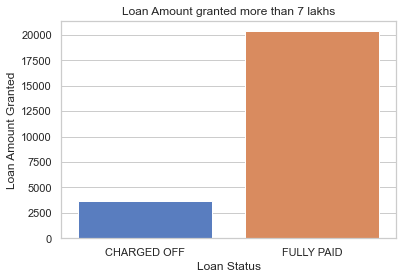

In [199]:
df_agg = loan_filtered[loan_filtered['funded_amnt'] > 7000].groupby(['loan_status'])['funded_amnt'].count().reset_index()
sns.barplot(x='loan_status', y='funded_amnt', data=df_agg)
plt.title('Loan Amount granted more than 7 lakhs')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount Granted')
plt.show()

<Figure size 720x720 with 0 Axes>

<AxesSubplot:xlabel='loan_status', ylabel='addr_state'>

Text(0.5, 0, 'Count of loan status to be defaulter')

Text(0, 0.5, 'State')

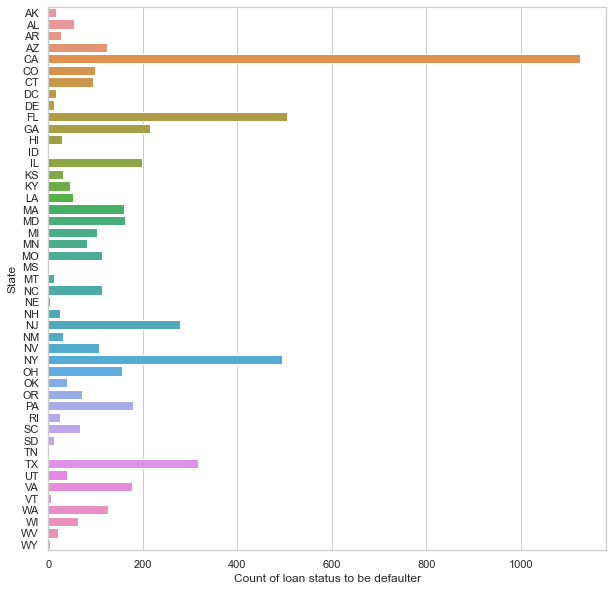

In [219]:
g = loan_filtered[loan_filtered['loan_status']=='CHARGED OFF'].groupby('addr_state')['loan_status'].count().reset_index()
plt.figure(figsize=(10,10))
sns.barplot(y='addr_state', x='loan_status', data=g)
plt.xlabel('Count of loan status to be defaulter')
plt.ylabel('State')
plt.show()